In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('data/employee_retention.csv', parse_dates = ['join_date', 'quit_date'])
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [2]:
df.head()
print(f'dataframe dimension:{df.shape}\n')
print(df.info())
print(df.describe(include = 'all', datetime_is_numeric = True))
# change company ID from int to category
df.company_id = df.company_id.astype('category')
print(df.info())
print(df.describe(include = 'all', datetime_is_numeric = True))

dataframe dimension:(24702, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB
None
          employee_id    company_id              dept     seniority  \
count    24702.000000  24702.000000             24702  24702.000000   
unique            NaN           NaN                 6           NaN   
top               NaN           NaN  customer_service           NaN   
freq              NaN           NaN              

In [3]:
print(f'no duplicated employee ID: {df.shape[0]== df.employee_id.nunique()}\n')
df.company_id.value_counts() 

no duplicated employee ID: True



1     8486
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     865
12      24
11      16
Name: company_id, dtype: int64

## Data Exploration

In [30]:
def xi_histogram(self, column, n_bin, xlabel, ylabel, title):
    """
    generate the histogram of a given column 
    
    Parameters:
        - column: name of the column to visualize
        - n_bin: number of bins
        - xlabel: string for x axis label
        - ylabel: string for y axis label
        - title: string for the chart
    """
    from matplotlib.ticker import AutoMinorLocator
    from matplotlib import gridspec
    fig = plt.figure(figsize = (20,18))
    n, bins, patches = plt.hist(df[column].dropna(), bins = n_bin)

    minor_locator = AutoMinorLocator(2)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    plt.grid(which = 'minor', color = 'white', lw = 0.5)

    # x ticks labels
    xticks = [(bins[idx+1] + value) / 2 for idx, value in enumerate(bins[:-1])]
    xticks_labels = ["{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]

    # remove y ticks
    plt.yticks([])

    plt.xticks(xticks, labels = xticks_labels) 

    # plot values on top of bars
    for idx, value in enumerate(n):
        if value > 0:
            plt.text(xticks[idx], value + 5, int(value), ha = 'center')

    plt.title(f'{title}', loc = 'center', fontsize = 18) 
    plt.xlabel(f'\n {xlabel}', fontsize = 14)
    plt.ylabel(f'{ylabel}', fontsize = 14)
    return 

### Q1. Daily Employee Census 

In [5]:
from datetime import date
start = date(year = 2011, month = 1, day = 24)
end = date(year = 2015, month = 12, day = 13)
census_index = pd.Series(
    pd.date_range(start,end), 
    name = 'day'
)
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('df', conn, index = False)
census_index.to_sql('census_index',conn, index = False) 
query = '''
    select  census_index.day, df.company_id, count(df.employee_id) employee_headcount
    from census_index
    left join df on
    census_index.day >= df.join_date and
    ifnull(df.quit_date, '2099-12-31') >= census_index.day
    group by df.company_id, census_index.day
''' 
table = pd.read_sql_query(query, conn)

In [6]:
table.head()

,day,company_id,employee_headcount
0,2011-01-24 00:00:00,1,25
1,2011-01-25 00:00:00,1,27
2,2011-01-26 00:00:00,1,29
3,2011-01-27 00:00:00,1,29
4,2011-01-28 00:00:00,1,29


In [7]:
df.loc[(df['company_id'] == 1) & (df['join_date'] <= '2011-02-02') & (df['quit_date'] >=  '2011-02-02')]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
412,224745.0,1,customer_service,19,108000.0,2011-01-24,2012-02-24
723,130683.0,1,customer_service,20,121000.0,2011-01-24,2012-01-06
790,410232.0,1,sales,15,191000.0,2011-01-31,2012-11-30
910,227626.0,1,data_science,15,244000.0,2011-01-24,2014-05-09
1593,933554.0,1,sales,28,191000.0,2011-01-24,2013-03-08
...,...,...,...,...,...,...,...
23303,202573.0,1,engineer,10,199000.0,2011-01-31,2011-11-22
23953,849982.0,1,design,10,112000.0,2011-01-24,2013-04-05
24094,991566.0,1,customer_service,6,78000.0,2011-01-31,2014-08-01
24248,515581.0,1,engineer,29,283000.0,2011-01-24,2013-07-05


## Q2. What are the main factors that drive employee churn? Do they make sense? explain your finds.

In [8]:
df.head()
df[df['quit_date'].isnull()]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaT
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaT
9,504159.0,1,sales,7,104000.0,2012-06-12,NaT
11,904158.0,2,marketing,17,230000.0,2015-05-11,NaT
...,...,...,...,...,...,...,...
24691,965573.0,6,data_science,6,159000.0,2012-09-27,NaT
24693,366356.0,9,data_science,10,173000.0,2014-09-11,NaT
24694,236400.0,1,customer_service,8,70000.0,2015-07-20,NaT
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT


In [9]:
df['quit_date'] = pd.to_datetime(df['quit_date'])
df['join_date'] = pd.to_datetime(df['join_date'])
# fill NA with default date 2015-12-31
df.quit_date.fillna(pd.to_datetime('12/31/2015'), inplace = True)
df[df['quit_date'] == pd.to_datetime('2015-12-31')]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2015-12-31
7,716309.0,2,customer_service,4,30000.0,2014-03-05,2015-12-31
9,504159.0,1,sales,7,104000.0,2012-06-12,2015-12-31
11,904158.0,2,marketing,17,230000.0,2015-05-11,2015-12-31
...,...,...,...,...,...,...,...
24691,965573.0,6,data_science,6,159000.0,2012-09-27,2015-12-31
24693,366356.0,9,data_science,10,173000.0,2014-09-11,2015-12-31
24694,236400.0,1,customer_service,8,70000.0,2015-07-20,2015-12-31
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,2015-12-31


In [10]:
# add duration of the employment
df = df.assign(
    employment_len_days =   (df['quit_date'] - df['join_date']).astype('timedelta64[D]'),
    employment_len_months = (df['quit_date'] - df['join_date']).astype('timedelta64[M]')  
)
df.head() 

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_len_days,employment_len_months
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,19.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,11.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31,444.0,14.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,12.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0


## seniority outliers

[99, 98, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
       employee_id company_id       dept  seniority    salary  join_date  \
24700      97289.0         10   engineer         98  266000.0 2011-12-13   
24701     604052.0          1  marketing         99  185000.0 2011-07-26   

       quit_date  employment_len_days  employment_len_months  
24700 2015-01-09               1123.0                   36.0  
24701 2013-12-06                864.0                   28.0  


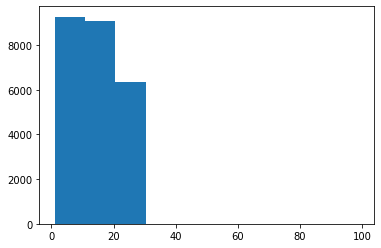

In [11]:
plt.hist(df.seniority)

print(sorted(df.seniority.unique(), reverse = True))
print(df[df.seniority > 30])
#remove seniority outliers
df = df[df.seniority < 30]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_len_days,employment_len_months,seniority_cat,salary_cat,employment_len_cat
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,19.0,senior,50k~100k,1 ~ 2 year
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,11.0,senior,150k~200k,0 ~ 1 year
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31,444.0,14.0,junior,100k~150k,1 ~ 2 year
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,12.0,senior,100k~150k,0 ~ 1 year
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0,senior,250k~300k,2 ~ 3 year


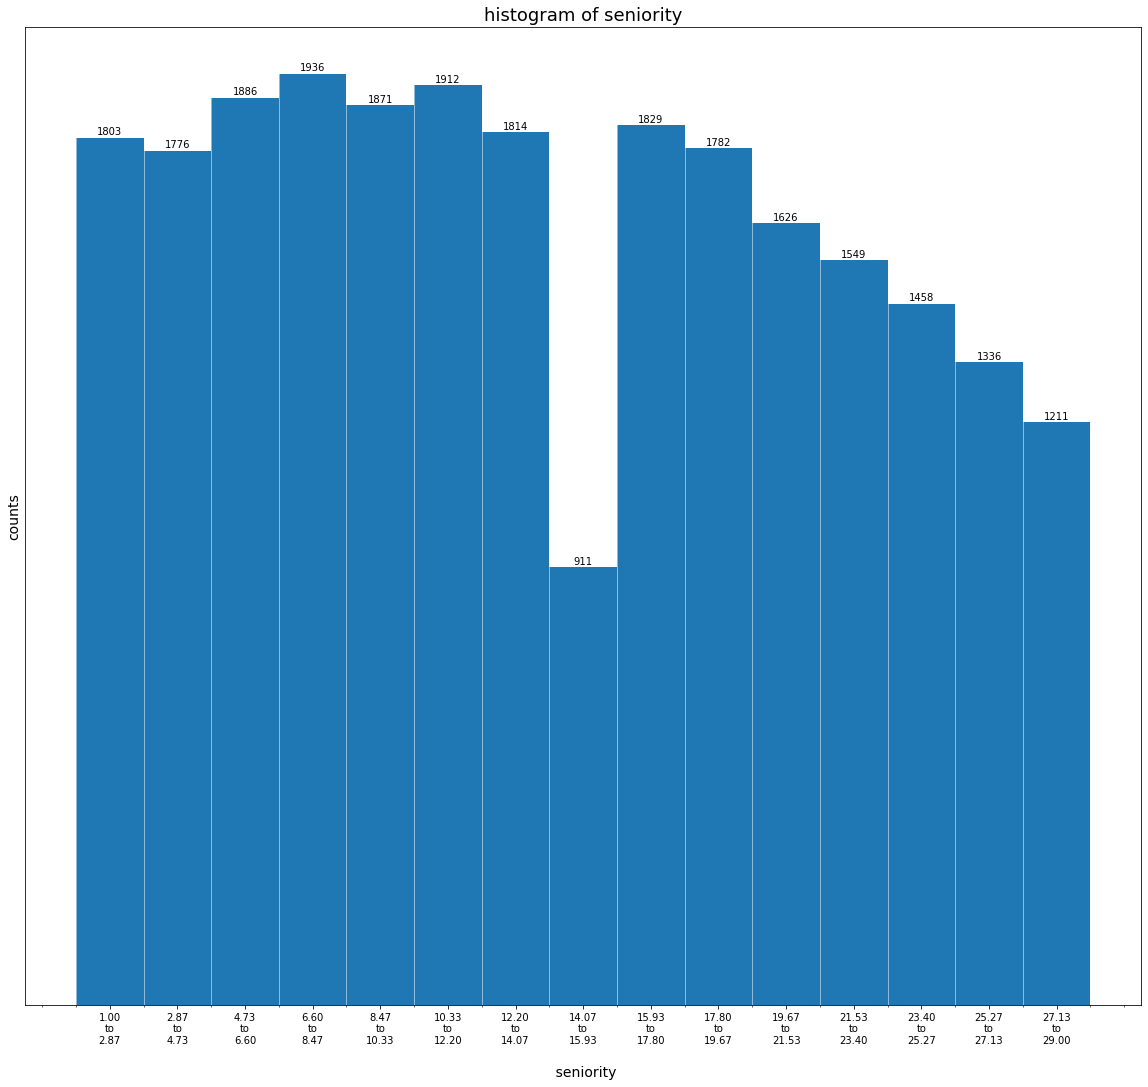

In [71]:
# histogram of seniority after removing two outliers
xi_histogram(df, 'seniority', 15, 'seniority', 'counts', 'histogram of seniority')
df['seniority_cat'] = pd.cut(df.seniority, bins = [0,15,30], labels = ['junior','senior'])
df.head()

In [68]:
df['employment_len_cat'] = pd.cut(
            df.employment_len_months, 
            bins = [0,12,24,36,48], 
            labels = ['0 ~ 1 year', '1 ~ 2 year',  '2 ~ 3 year','3 ~ 4 year']
)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_len_days,employment_len_months,seniority_cat,salary_cat,employment_len_cat
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,19.0,high,50k~100k,1 ~ 2 year
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,11.0,high,150k~200k,0 ~ 1 year
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31,444.0,14.0,low,100k~150k,1 ~ 2 year
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,12.0,high,100k~150k,0 ~ 1 year
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0,high,250k~300k,2 ~ 3 year


<AxesSubplot:xlabel='dept', ylabel='salary'>

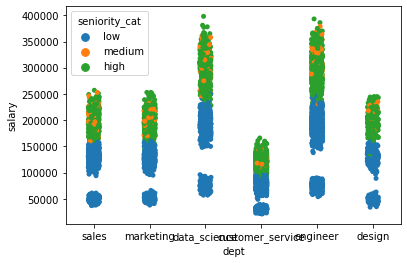

In [55]:
def xi_histogram(self, column, n_bin, xlabel, ylabel, title):
    """
    generate the histogram of a given column 
    
    Parameters:
        - column: name of the column to visualize
        - n_bin: number of bins
        - xlabel: string for x axis label
        - ylabel: string for y axis label
        - title: string for the chart
    """
    from matplotlib.ticker import AutoMinorLocator
    from matplotlib import gridspec
    fig = plt.figure(figsize = (16,6))
    n, bins, patches = plt.hist(df[column].dropna(), bins = n_bin)

    minor_locator = AutoMinorLocator(2)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    plt.grid(which = 'minor', color = 'white', lw = 0.5)

    # x ticks labels
    xticks = [(bins[idx+1] + value) / 2 for idx, value in enumerate(bins[:-1])]
    xticks_labels = ["{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]

    # remove y ticks
    plt.yticks([])

    plt.xticks(xticks, labels = xticks_labels) 

    # plot values on top of bars
    for idx, value in enumerate(n):
        if value > 0:
            plt.text(xticks[idx], value + 5, int(value), ha = 'center')

    plt.title(f'{title}', loc = 'center', fontsize = 18) 
    plt.xlabel(f'\n {xlabel}', fontsize = 14)
    plt.ylabel(f'{ylabel}', fontsize = 14)
    return 

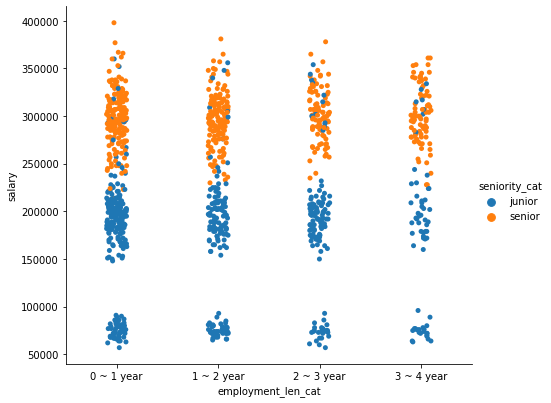

In [72]:
salary_com_1_ds = df.query('company_id == 1').query('dept == "data_science"')[['seniority_cat','salary', 'employment_len_cat']]
sns.catplot(
    x = 'employment_len_cat',
    y = 'salary',  
    hue = 'seniority_cat',
    data = salary_com_1_ds,
    kind = 'strip',
    height = 5.5,
    aspect = 1.2
) 

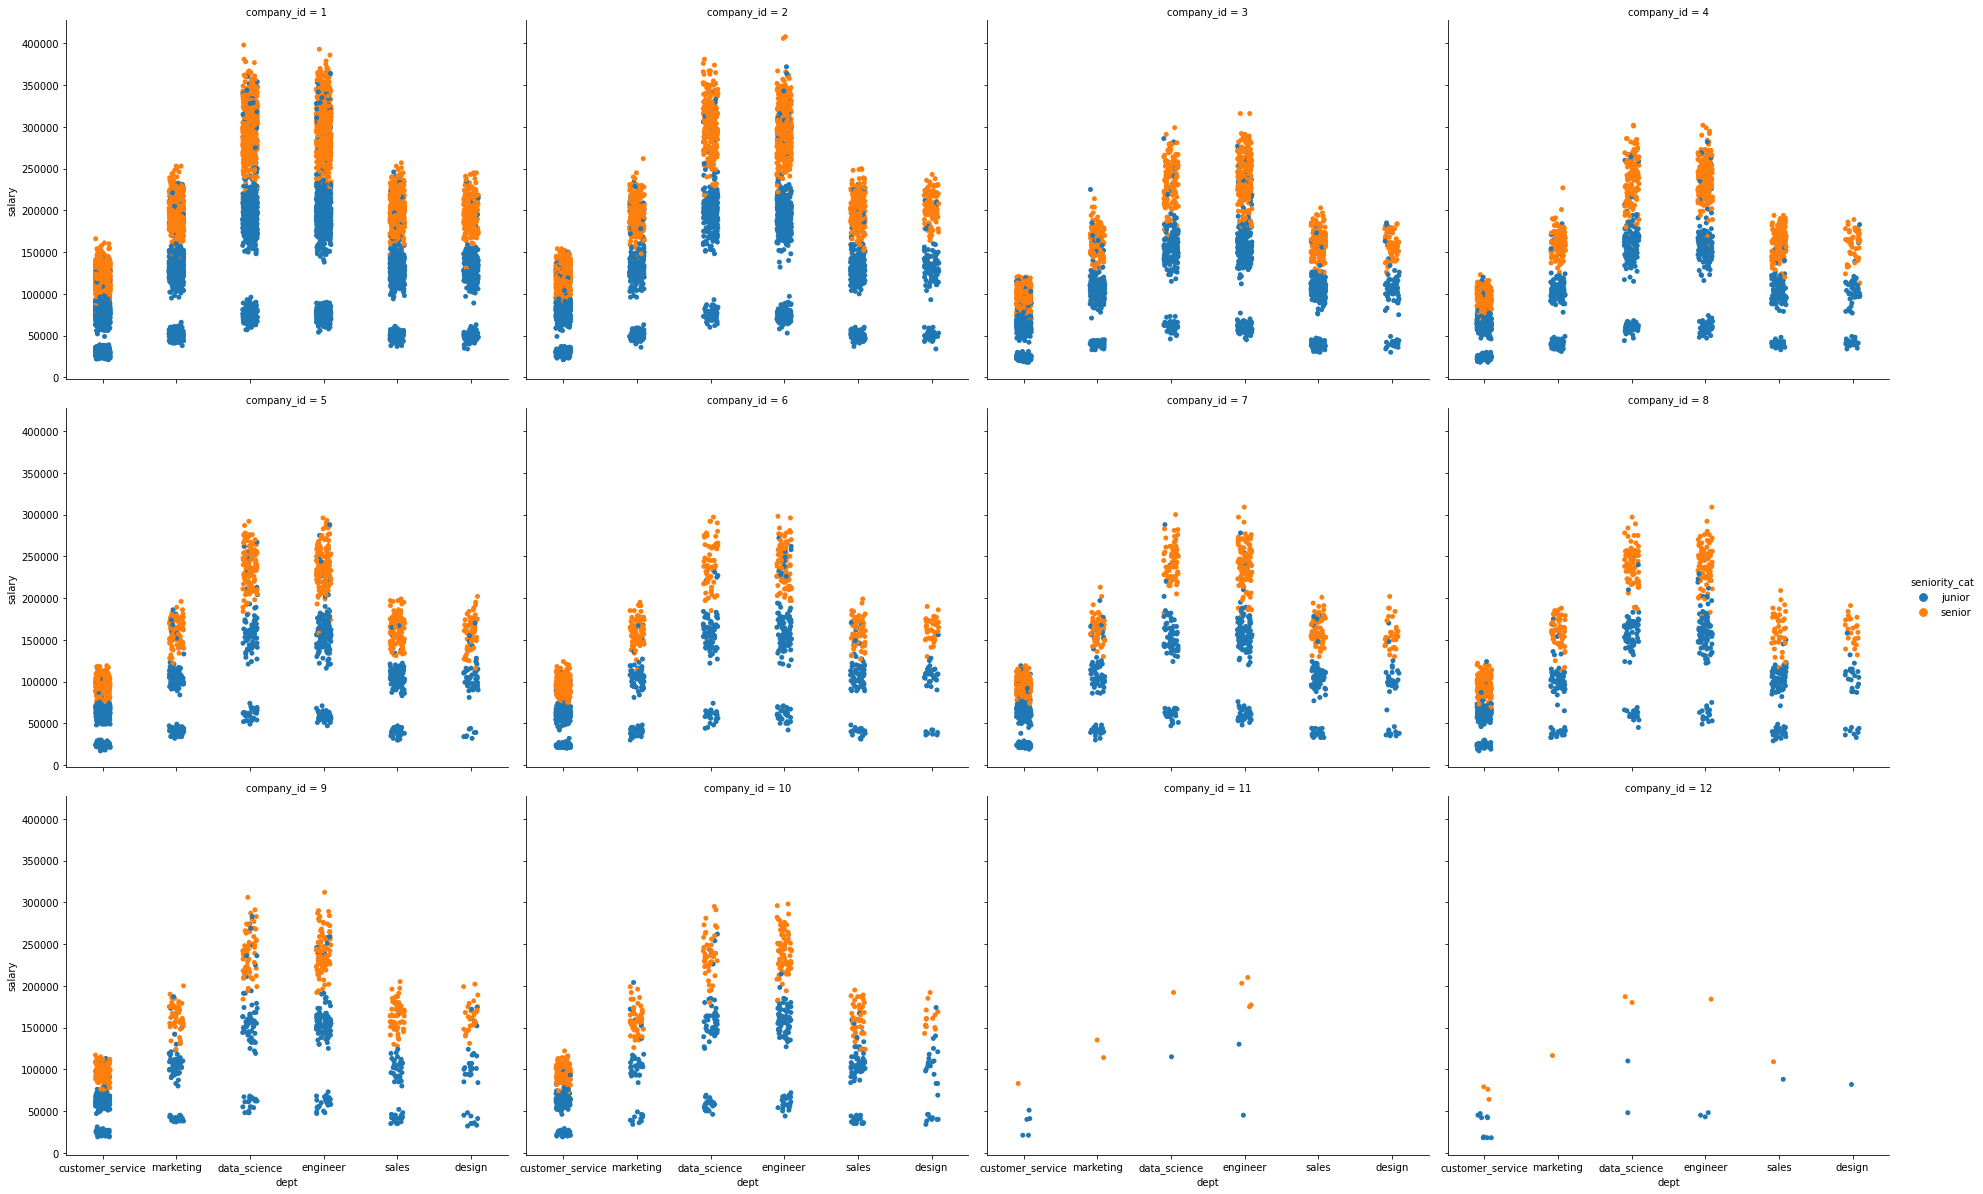

In [73]:
g = sns.catplot(
    x = 'dept',
    y = 'salary',
    col = 'company_id',
    col_wrap = 4,
    hue = 'seniority_cat',
    data = df,
    kind = 'strip',
    height = 5.5,
    aspect = 1.2
)

<AxesSubplot:>

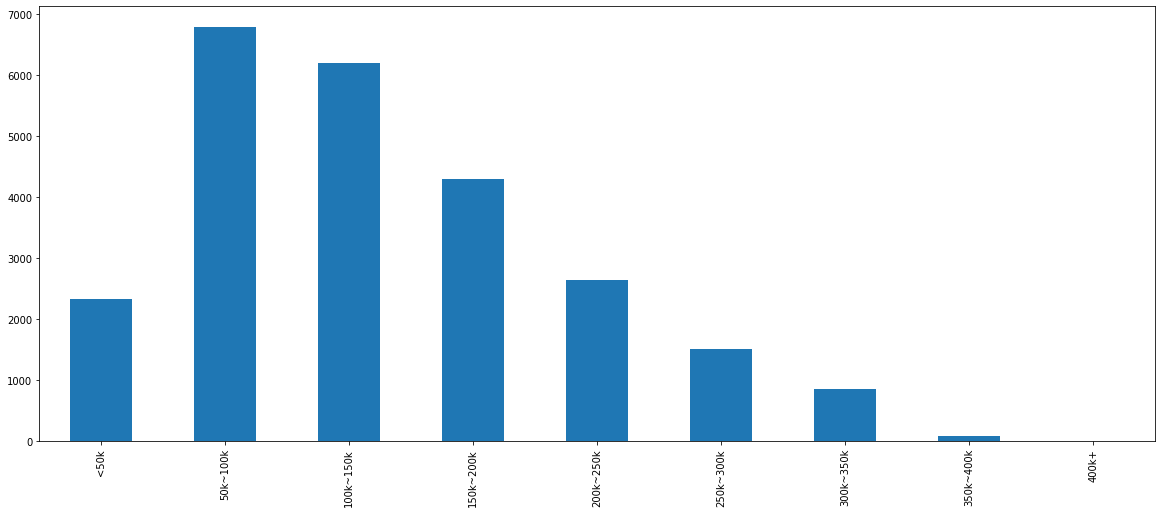

In [37]:
labels = ['<50k','50k~100k','100k~150k', '150k~200k', '200k~250k', '250k~300k', '300k~350k','350k~400k', '400k+']
df['salary_cat'] = pd.cut(
    df.salary, 
    bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000], 
    labels = labels
)
df.head()
plt.figure(figsize = (20,8))
df.salary_cat.value_counts().loc[labels].plot.bar()

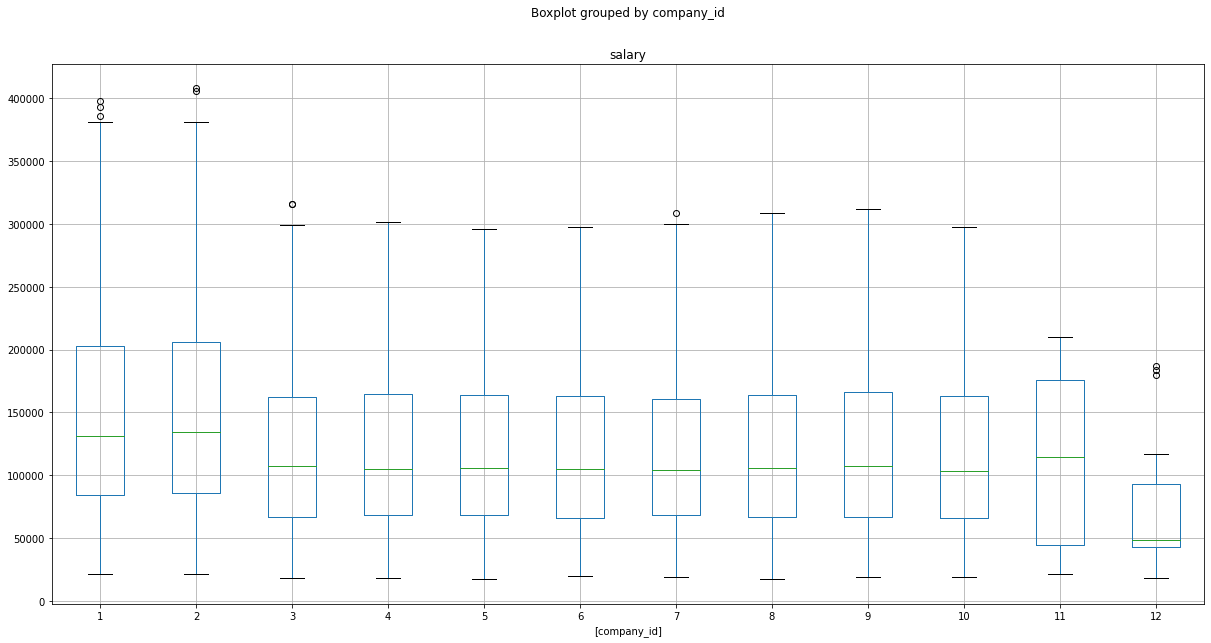

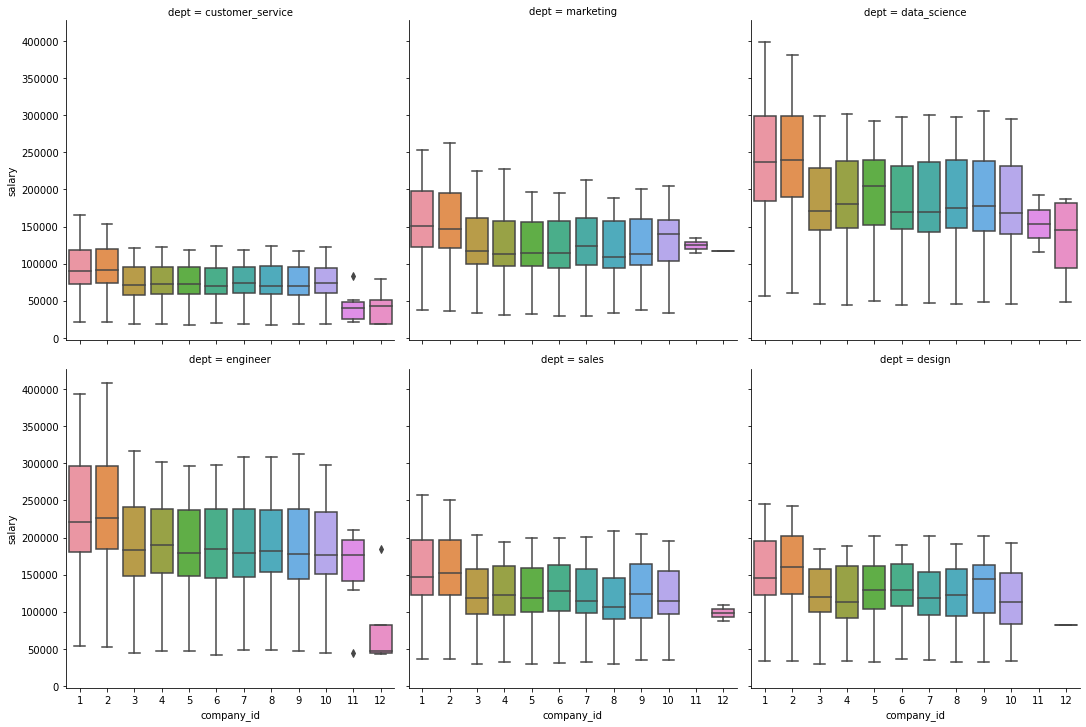

In [90]:
df.boxplot(
    column = 'salary',
    by = ['company_id'],
    figsize = (20,10)
)

sns.catplot(
    data = df,
    x = 'company_id',
    y = 'salary',
    col = 'dept',
    kind = 'box',
    col_wrap = 3
)

#df[['seniority_cat','salary', 'company_id', 'dept']].groupby(['company_id', 'dept']).head()

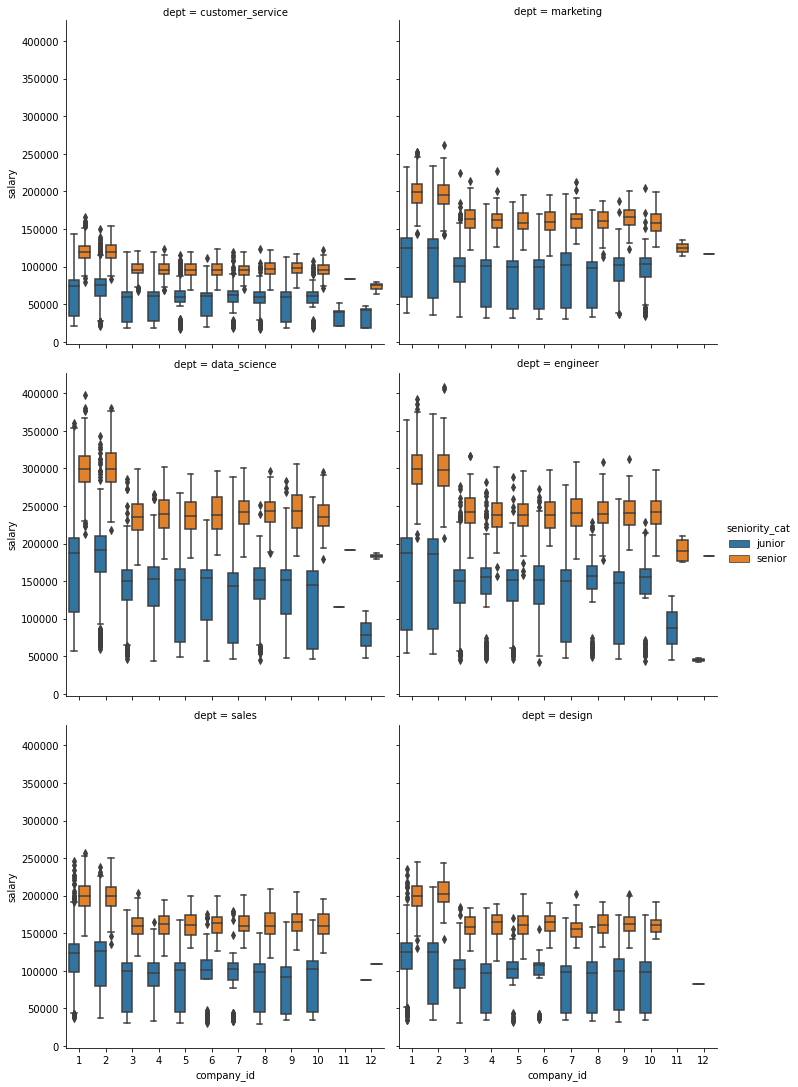

In [97]:
sns.catplot(
    data = df,
    x = 'company_id',
    y = 'salary',
    hue = 'seniority_cat',
    col = 'dept',
    kind = 'box',
    col_wrap = 2
)


In [92]:
df['company_size_cat'] = pd.cut(
            df.company_id, 
            bins = [0,2,10,12], 
            labels = ['big cap', 'medium cap',  'small cap']
)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_len_days,employment_len_months,seniority_cat,salary_cat,employment_len_cat,company_size_cat
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,19.0,senior,50k~100k,1 ~ 2 year,medium cap
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,11.0,senior,150k~200k,0 ~ 1 year,medium cap
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31,444.0,14.0,junior,100k~150k,1 ~ 2 year,medium cap
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,12.0,senior,100k~150k,0 ~ 1 year,medium cap
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0,senior,250k~300k,2 ~ 3 year,big cap


In [117]:
market_salary_dept_seniority= df.groupby(['dept', 'seniority_cat']).salary.mean()
market_salary_dept_seniority

dept              seniority_cat
customer_service  junior            61621.332815
                  senior           108566.327796
data_science      junior           155259.009009
                  senior           271729.844413
design            junior           102719.115735
                  senior           181186.579378
engineer          junior           154877.511592
                  senior           270300.395257
marketing         junior           102572.682392
                  senior           180390.171258
sales             junior           101921.926910
                  senior           180851.390922
Name: salary, dtype: float64

In [115]:
df['market_salary_dept_seniority'] = df.groupby(['dept', 'seniority_cat']).salary.transform('mean')
df.head() 

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_len_days,employment_len_months,seniority_cat,salary_cat,employment_len_cat,company_size_cat,quit,market_salary_dept_seniority
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,19.0,senior,50k~100k,1 ~ 2 year,medium cap,True,108566.327796
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,11.0,senior,150k~200k,0 ~ 1 year,medium cap,True,180390.171258
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31,444.0,14.0,junior,100k~150k,1 ~ 2 year,medium cap,False,102572.682392
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,12.0,senior,100k~150k,0 ~ 1 year,medium cap,True,108566.327796
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0,senior,250k~300k,2 ~ 3 year,big cap,True,271729.844413


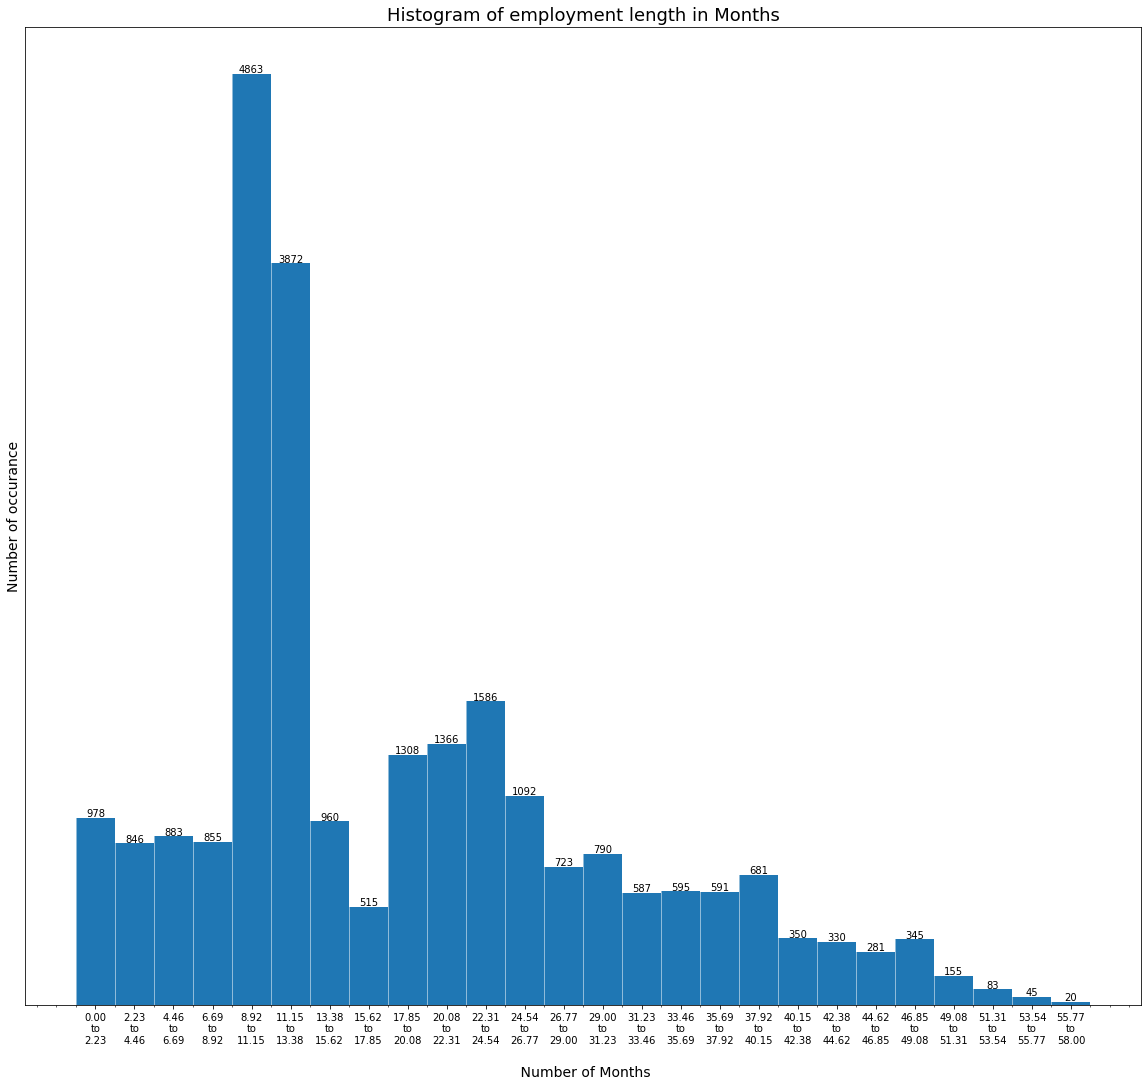

In [98]:
xi_histogram(df,'employment_len_months', 26, 'Number of Months', 'Number of occurance', 'Histogram of employment length in Months')

In [99]:
print(f'it looks like most people quit around 1 year of employment, and then around two years of employment')

it looks like most people quit around 1 year of employment, and then around two years of employment


In [101]:
# create y column: quit
df = df.assign(
    quit = df['quit_date'] < pd.to_datetime('12/31/2015')
)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_len_days,employment_len_months,seniority_cat,salary_cat,employment_len_cat,company_size_cat,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,19.0,senior,50k~100k,1 ~ 2 year,medium cap,True
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,11.0,senior,150k~200k,0 ~ 1 year,medium cap,True
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31,444.0,14.0,junior,100k~150k,1 ~ 2 year,medium cap,False
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,12.0,senior,100k~150k,0 ~ 1 year,medium cap,True
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0,senior,250k~300k,2 ~ 3 year,big cap,True


### Decision Tree Model with employment length

In [118]:
with_len_x = df[['company_size_cat', 'dept', 'seniority_cat','salary', 'employment_len_cat', 'market_salary_dept_seniority']]
with_len_y = df['quit']
# convert true or false to 1 or 0
with_len_y = with_len_y * 1
with_len_y.head()

0    1
1    1
2    0
3    1
4    1
Name: quit, dtype: int64

In [122]:
# convert factors to dummy variables
converted_with_len_x = pd.get_dummies(with_len_x, drop_first = True)
print(converted_with_len_x.head())
# build a decision tree to see significant factors
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
tree = DecisionTreeClassifier(
    max_depth = 4,
    min_samples_leaf = 30,
    class_weight = 'balanced',
    min_impurity_decrease = 0.001
)
tree.fit(converted_with_len_x, with_len_y)

# visualization
export_graphviz(
    tree, 
    out_file = 'tree_employment.dot',
    feature_names = converted_with_len_x.columns,
    proportion = True,
    rotate = True
)
with open('tree_employment.dot') as f:
    dot_graph = f.read()
s = Source.from_file('tree_employment.dot')
s.view()

     salary  market_salary_dept_seniority  company_size_cat_medium cap  \
0   89000.0                 108566.327796                            1   
1  183000.0                 180390.171258                            1   
2  101000.0                 102572.682392                            1   
3  115000.0                 108566.327796                            1   
4  276000.0                 271729.844413                            0   

   company_size_cat_small cap  dept_data_science  dept_design  dept_engineer  \
0                           0                  0            0              0   
1                           0                  0            0              0   
2                           0                  0            0              0   
3                           0                  0            0              0   
4                           0                  1            0              0   

   dept_marketing  dept_sales  seniority_cat_senior  \
0               0  

'tree_employment.dot.pdf'

### Decision Tree Model without employment length

In [120]:
no_len_x = df[['company_size_cat', 'dept', 'seniority_cat','salary', 'market_salary_dept_seniority' ]]
no_len_y = df['quit']
# convert true or false to 1 or 0
no_len_y = no_len_y * 1
no_len_y.head()

0    1
1    1
2    0
3    1
4    1
Name: quit, dtype: int64

In [121]:
# convert factors to dummy variables
converted_no_len_x = pd.get_dummies(no_len_x, drop_first = True)
converted_no_len_x.head()
# build a decision tree to see significant factors
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
tree_no_len = DecisionTreeClassifier(
    max_depth = 4,
    min_samples_leaf = 30,
    class_weight = 'balanced',
    min_impurity_decrease = 0.001
)
tree_no_len.fit(converted_no_len_x, no_len_y)

# visualization
export_graphviz(
    tree_no_len, 
    out_file = 'tree_employment_no_len.dot',
    feature_names = converted_no_len_x.columns,
    proportion = True,
    rotate = True
)
with open('tree_employment_no_len.dot') as f:
    dot_graph = f.read()
s = Source.from_file('tree_employment_no_len.dot')
s.view()

'tree_employment_no_len.dot.pdf'